## Visualize
    - 국제 시간 사용 시 국가별 시간 차이 고려
    - PC의 timezone에 따라 결과가 다르게 나올 수 있음

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
df_apple=pd.read_csv("data/AAPL.csv",index_col="Date",parse_dates=True)
df_apple.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700
2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200
2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800
2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900
2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600


<AxesSubplot:xlabel='Date'>

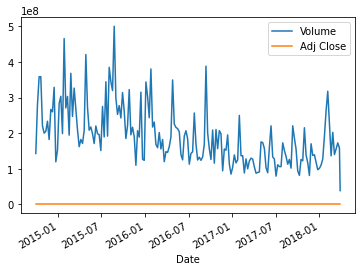

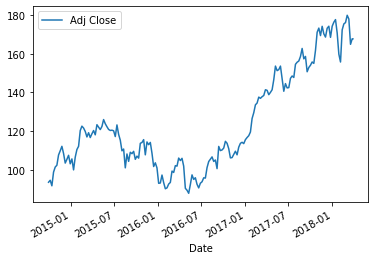

In [11]:
# 같은 축을 쓸 경우 Adj Closerk 가 변화량이 있음에도 Volume에 비해 상대적으로 변화량 크기가 작아 잘 보이지 않는다.
df_apple[["Volume","Adj Close"]].plot()
df_apple[["Adj Close"]].plot()

Text(0, 0.5, 'Close Price')

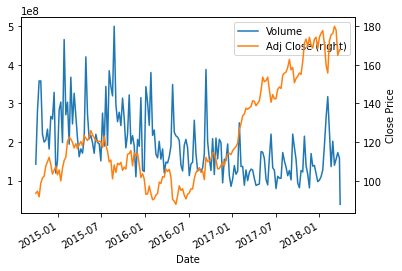

In [14]:
# Adj Close 축을 보조축으로 설정하면 잘 나옴
df_apple[["Volume","Adj Close"]].plot(secondary_y=["Adj Close"])

Text(0.5, 0, 'Apple Stock Price')

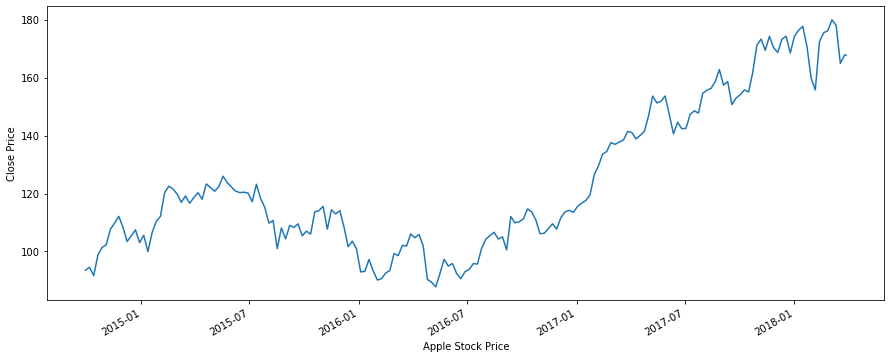

In [17]:
# 축 라벨 설정
df_apple["Adj Close"].plot(figsize=(15,6))
plt.ylabel("Close Price")
plt.xlabel("Overwrite Date")
plt.xlabel("Apple Stock Price")

<AxesSubplot:xlabel='Date'>

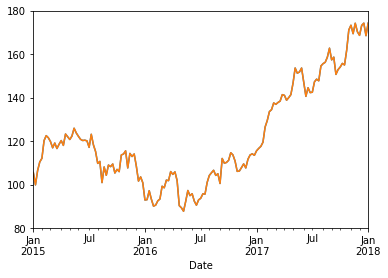

In [22]:
# x,y 범위를 xlim, ylim으로 지정함으로써 행을 슬라이딩 하는 효과
df_apple["Adj Close"]['2015-01-01':'2018-01-01'].plot()
df_apple["Adj Close"].plot(xlim=['2015-01-01','2018-01-01']
                            ,ylim=[80,180]) # 튜플이라서 "," 사용해야 함

In [23]:
index=df_apple['2015-01-01':'2018-01-01'].index
stock=df_apple['2015-01-01':'2018-01-01']["Adj Close"]

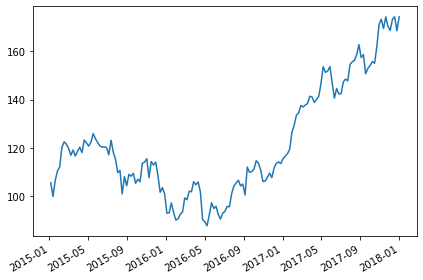

In [48]:
fig,ax=plt.subplots()
ax.plot_date(index,stock,'-') # '-'은 line 그래프 지정자,+,s,*,o 등으로 그래프 표시 가능
fig.autofmt_xdate() # X축 라벨 겹칠 때 알아서 기울여서 해결
plt.tight_layout() # Adjust the padding between and around subplots.

In [49]:
import matplotlib.dates as dates

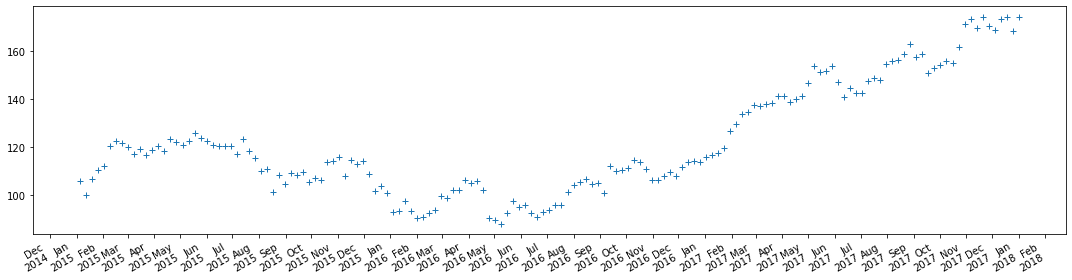

In [71]:
fig, ax=plt.subplots(figsize=(15,4))
ax.plot_date(index,stock,'+')
# ax.xaxis.set_major_locator(dates.AutoDateLocator()) # Set the locator of the major ticker.
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('%b\n%Y')) # x축 데이터 포맷 변경. %b\n%Y : 날짜를 한줄 내려쓰기
fig.autofmt_xdate()
plt.tight_layout()